### Getting Data ready for models

In [ ]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

pick_in = open('finaldata.pickle', 'rb')
df = pickle.load(pick_in)
pick_in.close()

In [ ]:
X = []
y = []


for feature, label in df:
    X.append(feature)
    y.append(label)

X = np.asarray(X)
y = np.asarray(y)

print("Data Types:", type(X), type(y))
print("Lengths:", len(X), len(y))
print("Shapes:", X.shape, y.shape)

Data Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Lengths: 32298 32298
Shapes: (32298, 2304) (32298,)


**X and y have to be converted for inputting into model.**

In [ ]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.20,
                                                  random_state=42, shuffle=True)

In [ ]:
print("Random Training shape:", X_train.shape, y_train.shape)
print("Random Testing shape:", X_test.shape, y_test.shape)

print("Random Training Type:", type(X_train), type(y_train))
print("Random Testing Type:", type(X_test), type(y_test))

Random Training shape: (25838, 2304) (25838,)
Random Testing shape: (6460, 2304) (6460,)
Random Training Type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Random Testing Type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>


*Lets visualize some of the faces and their labels.*

Labels are as follows:

Angry = 0<br>
Disgust = 1<br>
Fear = 2<br>
Happy = 3<br>
Sad = 4<br>
Surprise = 5<br>
Neutral = 6<br>

Text(0.5, 1.0, 'Label: 3')

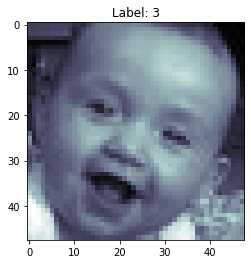

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0].reshape(48,48),cmap=plt.cm.bone)
plt.title('Label: {}'.format(y_train[0]))

Text(0.5, 1.0, 'Label: 2')

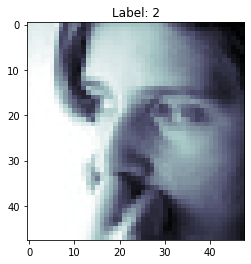

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[10].reshape(48,48),cmap=plt.cm.bone)
plt.title('Label: {}'.format(y_train[10]))

Text(0.5, 1.0, 'Label: 4')

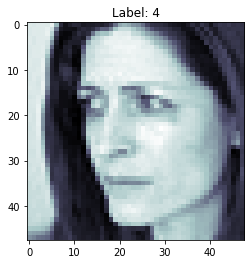

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_test[1000].reshape(48,48),cmap=plt.cm.bone)
plt.title('Label: {}'.format(y_test[1000]))

Labels for first 15 training samples: [3 6 3 3 5 2 6 4 2 3 2 4 6 4 0]


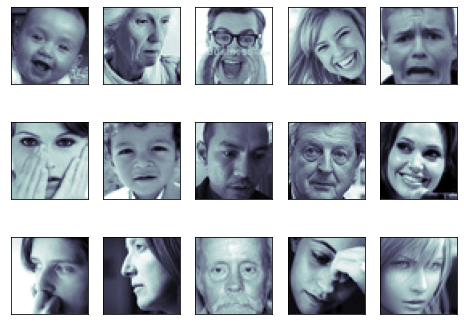

In [ ]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(48,48), cmap=plt.cm.bone)
    
print("Labels for first 15 training samples:", y_train[0:15])

### CNN Implementation

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
import tensorflow

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=7)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=7)

In [ ]:
import sys, os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

classes = 7
batch_size = 64
epochs = 120
width, height, depth = 48, 48, 1

In [ ]:
# Initialising the CNN

model = Sequential()

inputShape = (height, width, depth)

model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 16, 16, 64)       

In [ ]:
lr = 1e-3
batch_size = 64

opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
history = model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          shuffle=True)

Epoch 1/120
404/404 [==============================] - 5s 10ms/step - loss: 2.4278 - accuracy: 0.2511 - val_loss: 1.4981 - val_accuracy: 0.4176
Epoch 2/120
404/404 [==============================] - 4s 9ms/step - loss: 1.6860 - accuracy: 0.3936 - val_loss: 1.3850 - val_accuracy: 0.4796
Epoch 3/120
404/404 [==============================] - 4s 10ms/step - loss: 1.4934 - accuracy: 0.4537 - val_loss: 1.4734 - val_accuracy: 0.4385
Epoch 4/120
404/404 [==============================] - 4s 10ms/step - loss: 1.3655 - accuracy: 0.4897 - val_loss: 1.4276 - val_accuracy: 0.4596
Epoch 5/120
404/404 [==============================] - 4s 10ms/step - loss: 1.2691 - accuracy: 0.5270 - val_loss: 1.2831 - val_accuracy: 0.5110
Epoch 6/120
404/404 [==============================] - 4s 10ms/step - loss: 1.2076 - accuracy: 0.5408 - val_loss: 1.2544 - val_accuracy: 0.5127
Epoch 7/120
404/404 [==============================] - 4s 10ms/step - loss: 1.1685 - accuracy: 0.5548 - val_loss: 1.2072 - val_accuracy: 

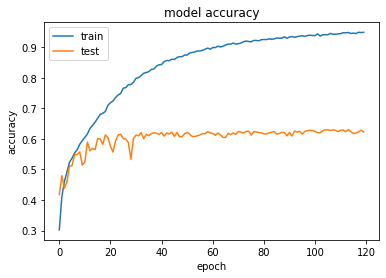

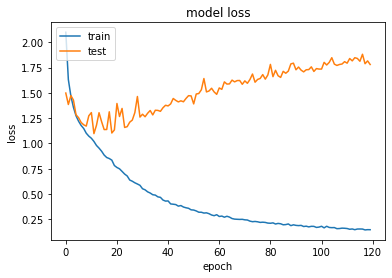

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

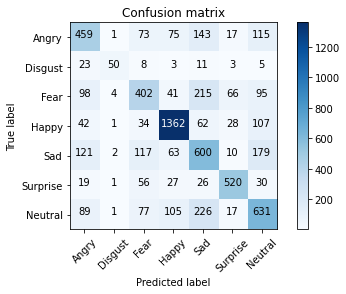

In [ ]:
# Function to plot confusion matrix    
from sklearn.metrics import confusion_matrix
import itertools 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

classs = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = classs) 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy*100, loss))


# serialize model to JSON
model_json = model.to_json()
with open("model_CNN.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_CNN.h5")
print("Saved model to disk")

202/202 [==============================] - 1s 3ms/step - loss: 1.7803 - accuracy: 0.6229
Validation: accuracy = 62.291020  ;  loss_v = 1.780278
Saved model to disk
